In [1]:
%load_ext autoreload
%autoreload 2
from getcoords import *
%matplotlib inline

### Camera Calibration
We will use some coefficients found online. Eventually we should just capture some images for given resolution on our own.

In [27]:
# The following params were found online for 1920x1080 GOPro video.
# https://www.theeminentcodfish.com/gopro-calibration/
intrinsic_matrix = np.array([[857.48296979, 0, 968.06224829],
                   [0, 876.71824265, 556.37145899],
                   [0, 0, 1]], dtype = np.float32)
distortion_coeffs = np.array([[-2.57614020e-01, 8.77086999e-02, -2.56970803e-04, -5.93390389e-04, -1.52194091e-02]], dtype = np.float32)
# We also have 2704x1520 videos -.-. No available calibration found, but it is the same aspect ratio as 1920x1080 so it may work for both cases.

### Getting video frame for calculation of projection matrix

In [2]:
# Get video:
# video_src = "videos/seagull.MP4" # for debugging, works nicely

# GoPro . MP4 Videos require specific codec -.-
# https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg
# Unfortunately it still doesnt work!!

# White table, fits in the frame
# video_src = "//DCPHARMAIN/RawDataEIN/Ladina/Behaviour/Barnes maze/Cx30u43 cKO/cohort1u2/9mth/day4/GOPR0982.MP4"
# video_src = "videos/GOPR0950.MP4"
video_src = "videos/test.avi" # this is GOPR0950.MP4 converted with ffmpeg -.-

# Brown table, almost fits
#video_src = "//DCPHARMAIN/RawDataEIN/Ladina/Behaviour/Barnes maze/Cx30u43 cKO/cohort1u2/2mth/2mth-testday9/Clip181.m4v" 

In [4]:
changeFlag = False
if changeFlag:
    pts, roi, vid, frame_pos = getGoodROI(video_src)
else:
    frame_pos = 194.0
    pts = np.array([[158.0, 405.0],
                   [1520.0, 405.0],
                   [1520.0, 2389.0],
                   [158.0, 2389.0]], dtype= np.int32)
    (vid,_) = go_to_frame([], frame_pos, video_source = video_src)
    _, frame = vid.read()
    roi = frame[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1],:]

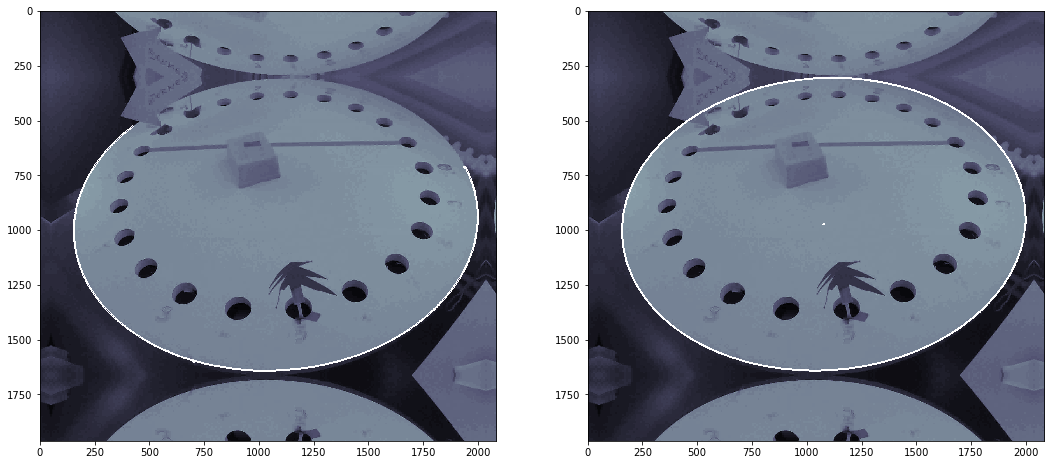

In [5]:
contour, gray = find_contours(roi)
ellip, contourVis, ellipVis= fit_ellipse(contour, gray)
# Visualize the result
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 18))
ax1.imshow(contourVis, cmap = 'bone')
ax2.imshow(ellipVis, cmap = 'bone')
plt.show()

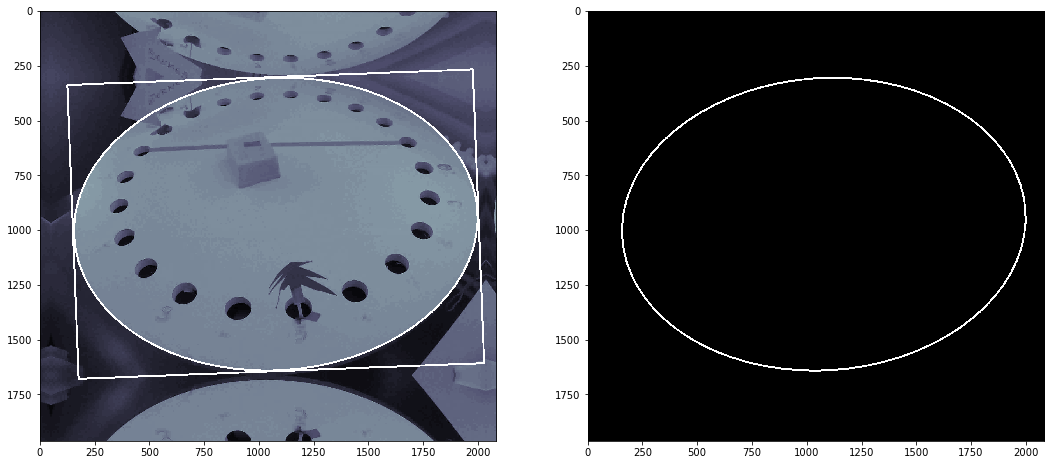

In [6]:
box, mask, grayVis = mask_box_ellip(gray, ellip)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 18))
ax1.imshow(grayVis, cmap = 'bone')
ax2.imshow(mask, cmap = 'bone')
plt.show()

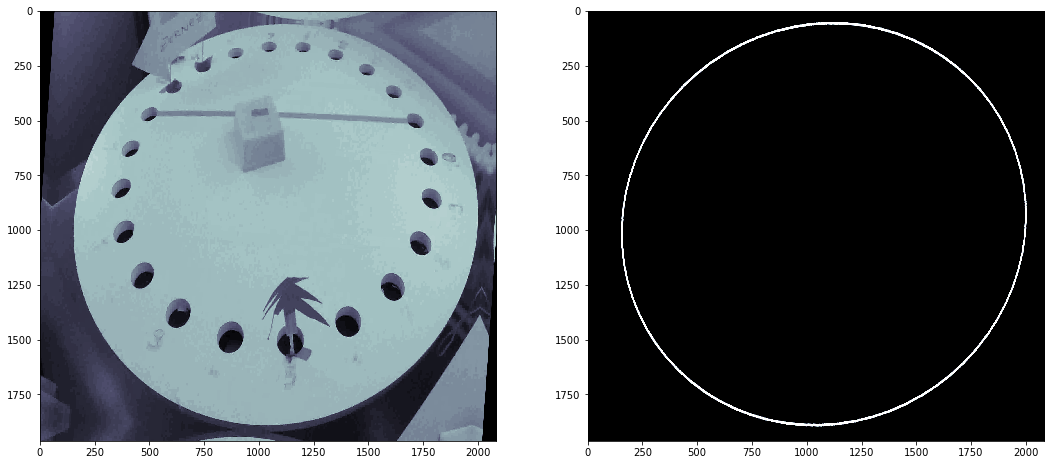

In [8]:
M, sf, warped, warped_mask = projective_transform(gray, mask, D = 1000)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 18))
ax1.imshow(warped, cmap = 'bone')
ax2.imshow(warped_mask, cmap = 'bone')
plt.show()